#Results

In [ ]:
#confusion matrix f1 ROC

In [2]:
from sklearn.metrics import multilabel_confusion_matrix
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from ray import tune

C:\Users\tkaczmarski\.conda\envs\pracamgr1\lib\site-packages\ray\autoscaler\_private\cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [33]:
y_pred  =torch.load('pred_total.pt')
y_true = torch.load('target_total.pt')

In [35]:
y_truelist =[]
for i in y_true:
    y_truelist.append(i.numpy())
    
y_predlist =[]
for i in y_pred:
    y_predlist.append(i.numpy())


In [36]:
pred_flat_list = []
for sublist in y_pred:
    for item in sublist:
        pred_flat_list.append(item)
        
true_flat_list = []
for sublist in y_true:
    for item in sublist:
        true_flat_list.append(item)

In [21]:
pred_arr = np.asarray(pred_flat_list)
true_arr = np.asarray(true_flat_list)

In [22]:
multilabel_confusion_matrix(pred_flat_list, true_flat_list)

array([[[11654,   191],
        [   87,  9259]],

       [[13387,   154],
        [  409,  7241]],

       [[16723,   273],
        [  122,  4073]]], dtype=int64)

In [24]:
#make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False)
cf_matrix = confusion_matrix(true_flat_list, pred_flat_list)

In [25]:
x_axis_labels = ['normal', 'CP', 'covid-19'] # labels for x-axis
y_axis_labels = ['normal', 'CP', 'covid-19'] # labels for y-axis

<AxesSubplot:>

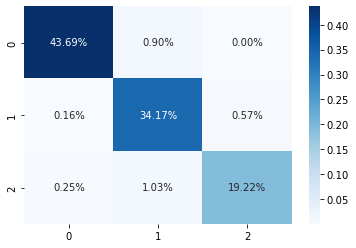

In [27]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [29]:
target_names = ['normal', 'CP', 'covid-19'] #covid-19, CP, normal

In [ ]:
#ResNet50
print(metrics.classification_report(pred_flat_list, true_flat_list, target_names=target_names))

In [30]:
#ResNet34
print(metrics.classification_report(pred_flat_list, true_flat_list, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.98      0.99      0.99      9346
          CP       0.98      0.95      0.96      7650
    covid-19       0.94      0.97      0.95      4195

    accuracy                           0.97     21191
   macro avg       0.97      0.97      0.97     21191
weighted avg       0.97      0.97      0.97     21191



In [14]:
#ResNet18
print(metrics.classification_report(pred_flat_list, true_flat_list, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      0.98      0.99      9647
          CP       0.97      0.95      0.96      7514
    covid-19       0.92      0.99      0.96      4030

    accuracy                           0.97     21191
   macro avg       0.96      0.97      0.97     21191
weighted avg       0.97      0.97      0.97     21191



In [ ]:
#BNN Results

In [4]:
y_pred  =torch.load('BNN_pred_total.pt')
y_true = torch.load('BNN_target_total.pt')

In [5]:
y_truelist =[]
for i in y_true:
    y_truelist.append(i.numpy())
    
y_predlist =[]
for i in y_pred:
    y_truelist.append(i.numpy())


In [6]:
pred_flat_list = []
for sublist in y_pred:
    for item in sublist:
        pred_flat_list.append(item)
        
true_flat_list = []
for sublist in y_true:
    for item in sublist:
        true_flat_list.append(item)

In [7]:
pred_arr = np.asarray(pred_flat_list)
true_arr = np.asarray(true_flat_list)

In [8]:
#make_confusion_matrix(cf_matrix_3x3, figsize=(8,6), cbar=False)
cf_matrix = confusion_matrix(true_flat_list, pred_flat_list)

<AxesSubplot:>

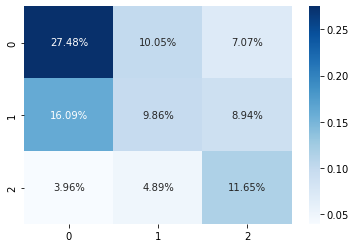

In [9]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [10]:
target_names = ['normal', 'CP', 'covid-19'] #covid-19, CP, normal

In [11]:
print(metrics.classification_report(pred_flat_list, true_flat_list, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.62      0.58      0.60     10073
          CP       0.28      0.40      0.33      5256
    covid-19       0.57      0.42      0.48      5862

    accuracy                           0.49     21191
   macro avg       0.49      0.47      0.47     21191
weighted avg       0.52      0.49      0.50     21191



In [13]:
#ROC CURVE BNN

In [15]:
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

In [16]:
ytest = true_arr #np.array([1,0,0,2,1,0,2])
ypred = pred_arr #np.array([1,0,0,2,1, 0,2])
#ytrain = true_arr#train_arr#np.array([1,0,0,2,1, 0,2])

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))


target= ['Normal','CP','Covid-19']

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [18]:
#ROC RESNET

In [47]:
y_pred  =torch.load('pred_total.pt')
y_true = torch.load('target_total.pt')

In [49]:
y_truelist =[]
for i in y_true:
    y_truelist.append(i.numpy())
    
y_predlist =[]
for i in y_pred:
    y_predlist.append(i.numpy())


In [50]:
pred_flat_list = []
for sublist in y_pred:
    for item in sublist:
        pred_flat_list.append(item)
        
true_flat_list = []
for sublist in y_true:
    for item in sublist:
        true_flat_list.append(item)

In [51]:
pred_arr = np.asarray(pred_flat_list)
true_arr = np.asarray(true_flat_list)

In [52]:
ytest = true_arr #np.array([1,0,0,2,1,0,2])
ypred = pred_arr #np.array([1,0,0,2,1, 0,2])
#ytrain = true_arr#train_arr#np.array([1,0,0,2,1, 0,2])

ROC AUC score: 0.9601202438547616


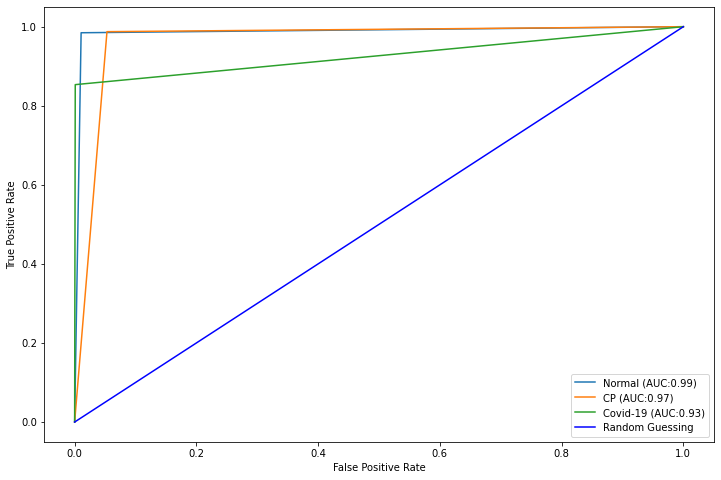

In [53]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))


target= ['Normal','CP','Covid-19']

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(ytest, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()